In [1]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

## Iris 데이터
- 3개의 클래스, 4개의 특징(feature)를 가지는 데이터
    - 각 클래스는 Iris의 종류를 나타낸다

In [2]:
iris = datasets.load_iris()

In [5]:
y = iris.target
x = iris.data

In [8]:
x[0], y[0]

(array([5.1, 3.5, 1.4, 0.2]), 0)

In [6]:
x[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [7]:
x.shape

(150, 4)

### iris data 각 차원별 시각화

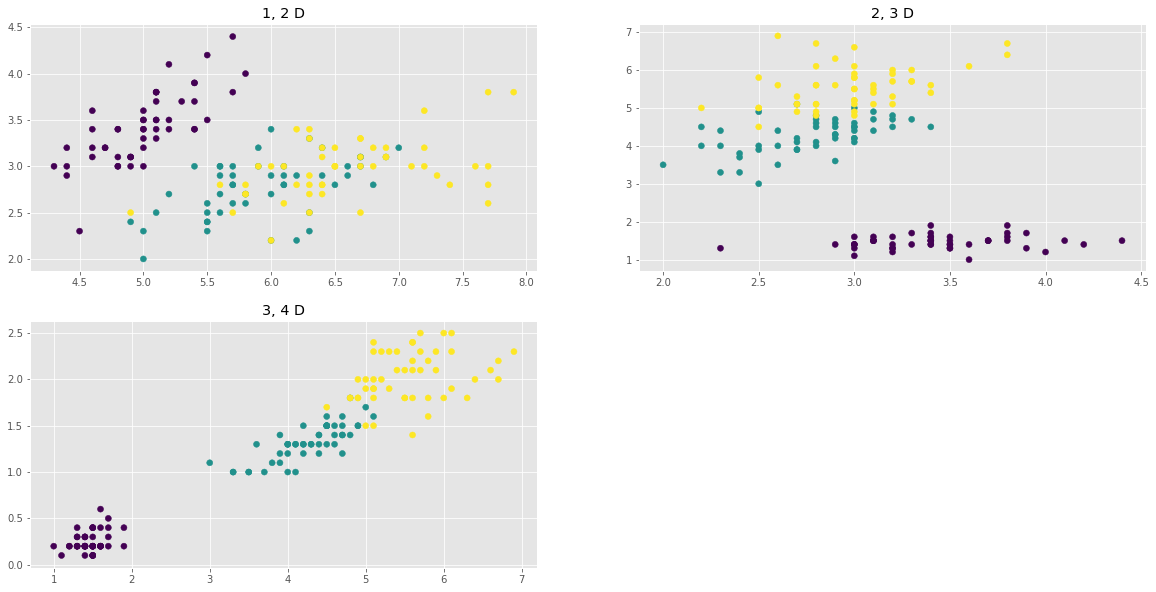

In [9]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.title('1, 2 D')
plt.scatter(x[:, 0], x[:, 1], c=y)

plt.subplot(2, 2, 2)
plt.title('2, 3 D')
plt.scatter(x[:, 1], x[:, 2], c=y)

plt.subplot(2, 2, 3)
plt.title('3, 4 D')
plt.scatter(x[:, 2], x[:, 3], c=y)
plt.show()

# PCA 계산
- 공분산 행렬
- eigen value, eigen vector

## 1. 공분산 행렬

### - x를 centering 한 후, 곱해준다.
- centering : 평균을 0으로 만들어줌

In [10]:
cov = np.dot((x - x.mean(axis=0)).T, (x - x.mean(axis=0)))

In [11]:
## 4 x 4 행렬

cov

array([[102.16833333,  -5.851     , 189.77866667,  77.01866667],
       [ -5.851     ,  28.0126    , -47.9352    , -17.5792    ],
       [189.77866667, -47.9352    , 463.86373333, 193.16173333],
       [ 77.01866667, -17.5792    , 193.16173333,  86.77973333]])

## 2. eigen value, eigen vector를 구한다.

In [12]:
ev, eig = np.linalg.eig(cov)

In [13]:
ev

array([629.50127448,  36.09429217,  11.70006231,   3.52877104])

In [14]:
eig

array([[ 0.36158968, -0.65653988, -0.58099728,  0.31725455],
       [-0.08226889, -0.72971237,  0.59641809, -0.32409435],
       [ 0.85657211,  0.1757674 ,  0.07252408, -0.47971899],
       [ 0.35884393,  0.07470647,  0.54906091,  0.75112056]])

## 3. 분산이 큰 ( eigen value가 큰 ) eigen vector만 선택한다.
- 2개를 선택해보자

In [15]:
eig_pca = eig[:, :2]

In [16]:
eig_pca

array([[ 0.36158968, -0.65653988],
       [-0.08226889, -0.72971237],
       [ 0.85657211,  0.1757674 ],
       [ 0.35884393,  0.07470647]])

## 4. 위에서 선택한 eigen vector로 (centerting된 ) 원래 데이터를 투영시킨다.

In [17]:
(x - x.mean(axis=0)).dot(eig_pca)[:10]

array([[-2.68420713, -0.32660731],
       [-2.71539062,  0.16955685],
       [-2.88981954,  0.13734561],
       [-2.7464372 ,  0.31112432],
       [-2.72859298, -0.33392456],
       [-2.27989736, -0.74778271],
       [-2.82089068,  0.08210451],
       [-2.62648199, -0.17040535],
       [-2.88795857,  0.57079803],
       [-2.67384469,  0.1066917 ]])

## 5. 3에서 선택한 개수만큼의 차원으로 축소된 데이터를 갖게된다.

In [18]:
(x - x.mean(axis=0)).dot(eig[:2].T)[:10]

array([[ 0.49194893, -1.34738775],
       [ 0.74790093, -0.96607778],
       [ 0.60237475, -1.15520829],
       [ 0.51567031, -0.95472654],
       [ 0.39013597, -1.41213209],
       [ 0.2269616 , -1.54984681],
       [ 0.40853353, -1.2656915 ],
       [ 0.46334422, -1.20654781],
       [ 0.63276008, -0.8519721 ],
       [ 0.59242176, -0.94699778]])

In [19]:
eig_pca

array([[ 0.36158968, -0.65653988],
       [-0.08226889, -0.72971237],
       [ 0.85657211,  0.1757674 ],
       [ 0.35884393,  0.07470647]])

# sklearn PCA 모듈과 비교

In [20]:
pca = PCA(n_components=2).fit(x)

- 주성분 비교

In [21]:
## 주성분 

pca.components_.T

array([[ 0.36158968,  0.65653988],
       [-0.08226889,  0.72971237],
       [ 0.85657211, -0.1757674 ],
       [ 0.35884393, -0.07470647]])

In [22]:
eig_pca

array([[ 0.36158968, -0.65653988],
       [-0.08226889, -0.72971237],
       [ 0.85657211,  0.1757674 ],
       [ 0.35884393,  0.07470647]])

- 차원 축소 결과

In [23]:
pca.transform(x)[:10]

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ]])

In [24]:
(x - x.mean(axis=0)).dot(eig_pca)[:10]

array([[-2.68420713, -0.32660731],
       [-2.71539062,  0.16955685],
       [-2.88981954,  0.13734561],
       [-2.7464372 ,  0.31112432],
       [-2.72859298, -0.33392456],
       [-2.27989736, -0.74778271],
       [-2.82089068,  0.08210451],
       [-2.62648199, -0.17040535],
       [-2.88795857,  0.57079803],
       [-2.67384469,  0.1066917 ]])

# 시각화

In [25]:
import matplotlib.pyplot as plt

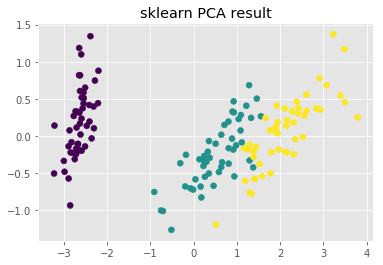

In [26]:
plt.title('sklearn PCA result')
plt.scatter(pca.transform(x)[:, 0], pca.transform(x)[:, 1], c=y)
plt.show()

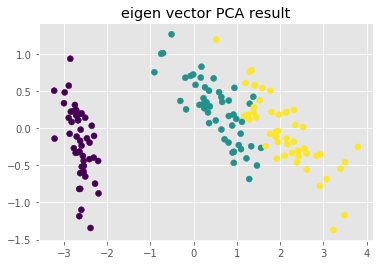

In [27]:
eig_result = (x - x.mean(axis=0)).dot(eig_pca)
plt.title('eigen vector PCA result')
plt.scatter(eig_result[:, 0], eig_result[:, 1], c=y)
plt.show()

## PCA 단점
- PCA를 시행할 데이터는 방향적으로 의미가 있어야 PCA의 결과도 의미가 있다.